<a href="https://www.kaggle.com/code/mohamedbakrey/make-a-prediction-for-hospital-mortality?scriptVersionId=92575103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loading Library

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [220]:
df=pd.read_csv('../input/in-hospital-mortality-prediction/data01.csv')

### Some of details for data

In [221]:
df.head(10)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230000,21.166667,0.500000,40.000000,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225000,33.444444,0.500000,78.000000,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268000,30.571429,0.500000,71.500000,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370000,38.571429,0.600000,75.000000,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250000,22.000000,0.600000,50.000000,55
5,1,154653,0.0,76,1,24.262293,1,1,0,0,...,136.250000,8.466667,96.750000,13.125000,1.771429,7.310000,30.500000,0.600000,65.500000,35
6,1,194420,0.0,72,1,39.667426,1,0,0,0,...,144.133333,8.775000,106.666667,15.200000,1.875000,7.169231,26.800000,0.625000,69.769231,55
7,1,153461,0.0,83,2,22.311111,1,1,0,1,...,140.000000,9.171429,104.250000,12.571429,2.187500,7.550000,27.571429,0.650000,31.333333,75
8,1,113076,0.0,61,2,19.992243,1,1,0,1,...,141.090909,9.443750,103.181818,16.863636,2.035294,7.360000,25.772727,0.666667,46.000000,50
9,1,147252,0.0,67,1,45.032030,1,0,0,1,...,142.300000,8.150000,97.600000,12.000000,2.200000,7.360000,36.700000,0.700000,67.000000,55


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [223]:
del(df['ID'])

In [224]:
df.describe().style.background_gradient(cmap = 'copper')

,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1.900000,45.250000,169.500000,4.400000,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,2

In [225]:
df.shape


(1177, 50)

In [226]:
df.tail()

,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1172,2,0.0,62,1,25.516870,1,1,0,1,0,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,0.0,78,1,25.822710,0,1,0,1,0,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,0.0,85,2,23.891779,1,1,0,1,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,0.0,79,2,35.288554,0,0,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25
1176,2,0.0,47,1,23.121384,1,0,0,1,0,...,135.285714,9.085714,93.857143,20.285714,2.566667,NaN,26.571429,NaN,NaN,55


In [227]:
 '''memory_usage() returns a Pandas Series having the memory 
 usage of each column (in bytes) in a Pandas DataFrame.'''
df.memory_usage(deep=True)


Index                        128
group                       9416
outcome                     9416
age                         9416
gendera                     9416
BMI                         9416
hypertensive                9416
atrialfibrillation          9416
CHD with no MI              9416
diabetes                    9416
deficiencyanemias           9416
depression                  9416
Hyperlipemia                9416
Renal failure               9416
COPD                        9416
heart rate                  9416
Systolic blood pressure     9416
Diastolic blood pressure    9416
Respiratory rate            9416
temperature                 9416
SP O2                       9416
Urine output                9416
hematocrit                  9416
RBC                         9416
MCH                         9416
MCHC                        9416
MCV                         9416
RDW                         9416
Leucocyte                   9416
Platelets                   9416
Neutrophil

In [228]:
#reove duplicate
df.drop_duplicates(inplace=True)

# We can work EDA for data

In [229]:
df['outcome'].unique()

array([ 0.,  1., nan])

In [230]:
df.groupby('age')['outcome'].mean()

age
19    0.0
25    0.0
28    1.0
32    0.0
35    0.0
     ... 
95    1.0
96    0.4
97    0.0
98    0.0
99    1.0
Name: outcome, Length: 68, dtype: float64

<AxesSubplot:xlabel='age'>

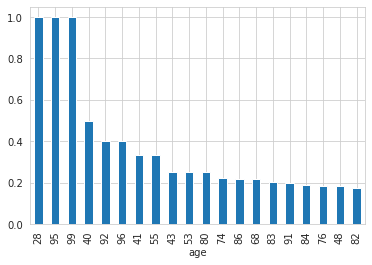

In [231]:
df.groupby('age')['outcome'].mean().nlargest(20).plot.bar()

### Calc the rating distribution

<AxesSubplot:xlabel='age', ylabel='Density'>

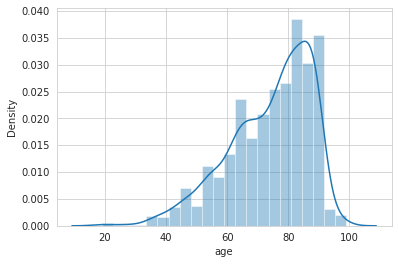

In [232]:
sns.set_style(style='whitegrid')
sns.distplot(df['age'])

Text(0.5, 0, 'Number of outlets')

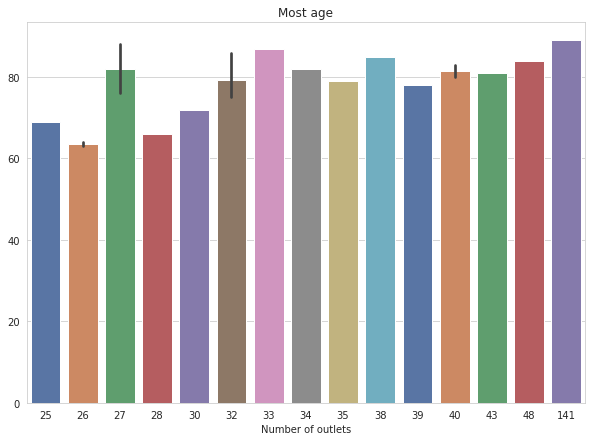

In [233]:
plt.figure(figsize=(10,7))
chains=df['age'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most age")
plt.xlabel("Number of outlets") 

In [234]:
df.columns

Index(['group', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [235]:
df.column=['group', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

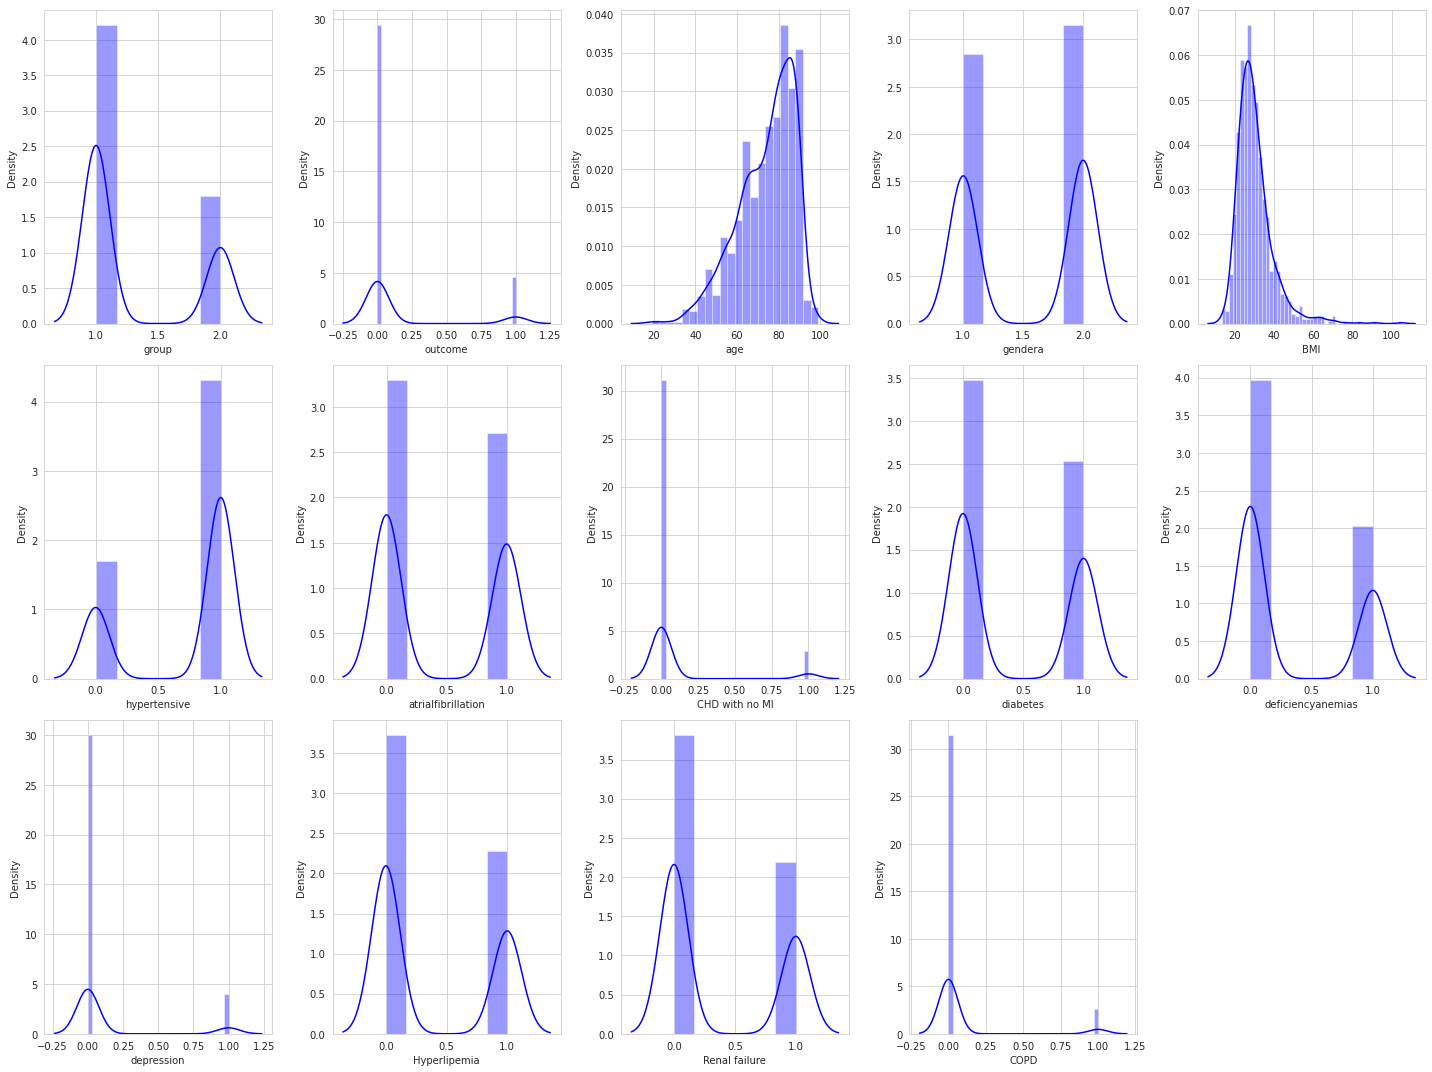

In [236]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='blue',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [237]:
px.scatter(df, x="age", y="heart rate", color="outcome")

In [238]:
px.scatter(df, x="age", y="heart rate", color="outcome", marginal_y="violin", marginal_x="box")

In [239]:
# Checking the missing values
df.isnull().sum()

group                         0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocy

In [240]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['outcome',
 'BMI',
 'heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Respiratory rate',
 'temperature',
 'SP O2',
 'Urine output',
 'Neutrophils',
 'Basophils',
 'Lymphocyte',
 'PT',
 'INR',
 'Creatine kinase',
 'glucose',
 'Blood calcium',
 'PH',
 'Lactic acid',
 'PCO2']

In [241]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

outcome has 0.085 % missing values
BMI has 18.2668 % missing values
heart rate has 1.1045 % missing values
Systolic blood pressure has 1.3594 % missing values
Diastolic blood pressure has 1.3594 % missing values
Respiratory rate has 1.1045 % missing values
temperature has 1.6143 % missing values
SP O2 has 1.1045 % missing values
Urine output has 3.0586 % missing values
Neutrophils has 12.2345 % missing values
Basophils has 22.0051 % missing values
Lymphocyte has 12.3195 % missing values
PT has 1.6992 % missing values
INR has 1.6992 % missing values
Creatine kinase has 14.0187 % missing values
glucose has 1.5293 % missing values
Blood calcium has 0.085 % missing values
PH has 24.8088 % missing values
Lactic acid has 19.4562 % missing values
PCO2 has 24.9788 % missing values


In [242]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [243]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

group                       0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR       

In [244]:
df['outcome'].value_counts()

0.0    1018
1.0     159
Name: outcome, dtype: int64

In [245]:
df['age'].value_counts()

89    141
84     48
81     43
83     40
80     40
     ... 
28      1
25      1
98      1
99      1
95      1
Name: age, Length: 68, dtype: int64

In [246]:
df['heart rate'].value_counts()

80.000000     4
88.000000     4
61.000000     4
83.782609     4
82.000000     4
             ..
96.791667     1
81.964286     1
108.675000    1
75.400000     1
67.289855     1
Name: heart rate, Length: 1094, dtype: int64

# Using Machine Learning 

In [247]:
x = df.drop('outcome', axis=1)
y = df['outcome']

In [248]:
#Spliting dataset into training set and testing test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [249]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:"  ,X_test.shape)
print("Shape of y_test:"  ,y_test.shape)

Shape of X_train: (941, 49)
Shape of y_train: (941,)
Shape of X_test: (236, 49)
Shape of y_test: (236,)


# Feature Scaling

In [257]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# RandomForestClassifier

In [315]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state =0)
classifier1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [316]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [317]:
print('Ridge Regression Train Score is : ' , classifier1.score(X_train, y_train))
print('Ridge Regression Test Score is : ' , classifier1.score(X_test, y_test))

Ridge Regression Train Score is :  0.997874601487779
Ridge Regression Test Score is :  0.902542372881356


In [318]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       211
         1.0       0.67      0.16      0.26        25

    accuracy                           0.90       236
   macro avg       0.79      0.58      0.60       236
weighted avg       0.88      0.90      0.87       236



In [319]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[209,   2],
       [ 21,   4]])

In [320]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)


total=sum(sum(confusion_matrix))

ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('ppv : ', ppv )

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('npv : ', npv)

Sensitivity :  0.908695652173913
Specificity :  0.6666666666666666
ppv :  0.990521327014218
npv :  0.16


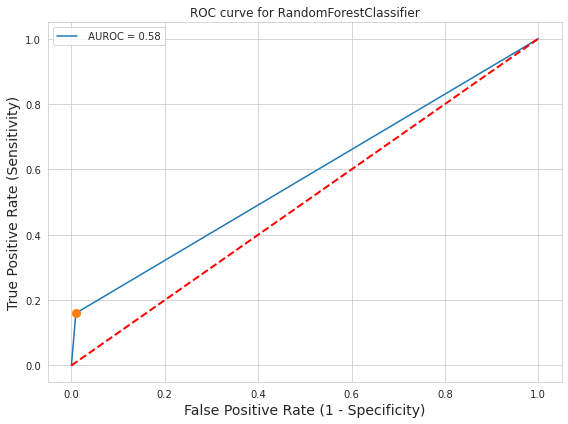

In [321]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()


# XGBClassifier

In [322]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[23:18:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [323]:
print('model_xgb Train Score is : ' , model_xgb.score(X_train, y_train))
print('model_xgb Test Score is : ' , model_xgb.score(X_test, y_test))

model_xgb Train Score is :  1.0
model_xgb Test Score is :  0.9067796610169492


In [325]:
# Predicting the Test set results
y_pred1 = model_xgb.predict(X_test)
y_pred1[:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [329]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix2=confusion_matrix(y_test,y_pred1)
confusion_matrix2

array([[207,   4],
       [ 18,   7]])

In [330]:
from sklearn.metrics import plot_confusion_matrix
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred1)

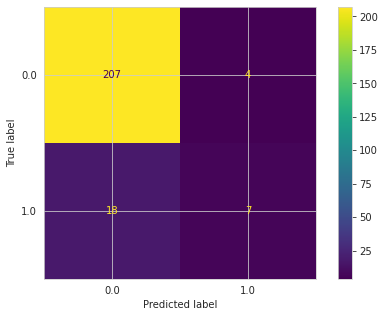

In [332]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model_xgb.classes_)
disp.plot()
plt.show()

In [333]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, y_pred1)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, y_pred1)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, y_pred1)

In [334]:
print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)

The mean_absolute_error 0.09322033898305085
The mean_Squre_error 0.09322033898305085
The Medain_absolute_error 0.0


In [335]:
total=sum(sum(confusion_matrix2))

sensitivity = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.92
Specificity :  0.6363636363636364


In [336]:
total=sum(sum(confusion_matrix2))

ppv = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[0,1])
print('ppv : ', ppv )

npv = confusion_matrix2[1,1]/(confusion_matrix2[1,0]+confusion_matrix2[1,1])
print('npv : ', npv)

ppv :  0.981042654028436
npv :  0.28


In [ ]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred_dt)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Decision Tree Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

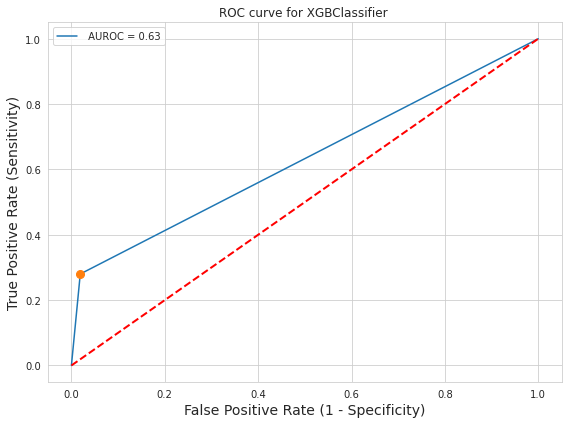

In [338]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred1)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XGBClassifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()